In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import time
from selenium.webdriver.common.action_chains import ActionChains
l=13
browser=webdriver.Chrome()
browser.get('https://www.stockbiz.vn/IndicesStats.aspx')
browser.maximize_window()
xlist = []
for k in range(0, l, 1):
    soup = BeautifulSoup(browser.page_source, features="html.parser")
    k=k+1
    time.sleep(1)
    body = soup.find("tbody")
    data = body.find_all("tr")
    for i in data:
        td = i.find_all("td")
        list = [td[0].text, td[1].text]
        list2 = td[2].find_all("span", class_="bong_tron")
        for j in list2:
            list.append(j.text)
        print(list)
        xlist.append(list)
    text2 = "//ul[@class='pagination']/li[last()]/a"
    button = browser.find_element("xpath",text2)
    actions = ActionChains(browser)
    actions.move_to_element(button).perform()
    button.click()
df = pd.DataFrame(xlist,columns=["Ngày","Kì","1","2","3","4","5", "6"])
df.to_csv("./vietlott.csv")

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 106
Current browser version is 113.0.5672.93 with binary path C:\Program Files\Google\Chrome\Application\chrome.exe
Stacktrace:
Backtrace:
	Ordinal0 [0x005F1353+2233171]
	Ordinal0 [0x00588E31+1805873]
	Ordinal0 [0x004966FD+812797]
	Ordinal0 [0x004B8C6D+953453]
	Ordinal0 [0x004B4200+934400]
	Ordinal0 [0x004B19C9+924105]
	Ordinal0 [0x004E806C+1146988]
	Ordinal0 [0x004E7A6A+1145450]
	Ordinal0 [0x004E18A6+1120422]
	Ordinal0 [0x004BA73D+960317]
	Ordinal0 [0x004BB71F+964383]
	GetHandleVerifier [0x0089A2C2+2728322]
	GetHandleVerifier [0x0088C184+2670660]
	GetHandleVerifier [0x0068102A+528106]
	GetHandleVerifier [0x0067FE10+523472]
	Ordinal0 [0x0059028C+1835660]
	Ordinal0 [0x00594758+1853272]
	Ordinal0 [0x00594845+1853509]
	Ordinal0 [0x0059E7E4+1894372]
	BaseThreadInitThunk [0x76B70419+25]
	RtlGetAppContainerNamedObjectPath [0x771874ED+237]
	RtlGetAppContainerNamedObjectPath [0x771874BD+189]


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
df = pd.read_csv("vietlott.csv")
df.tail()

,Unnamed: 0,Ngày,Kì,1,2,3,4,5,6
99,99,03/04/2022,870,5,11,20,26,40,43
100,100,01/04/2022,869,2,19,25,32,41,44
101,101,30/03/2022,868,1,12,26,28,39,45
102,102,27/03/2022,867,8,17,21,39,44,45
103,103,25/03/2022,866,1,12,13,27,29,35


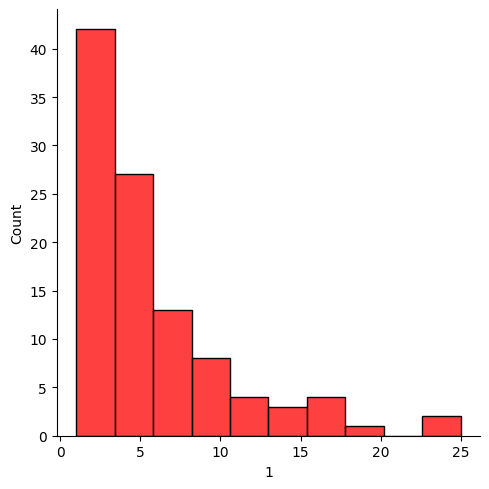

In [12]:
vietlott = pd.read_csv("vietlott.csv")
sb.displot(vietlott, x='1', color='red')

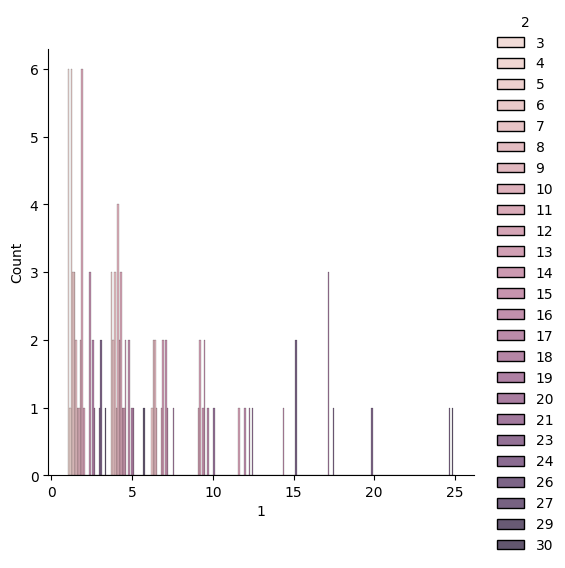

In [13]:
sb.displot(vietlott,x='1',hue='2',multiple='dodge')